# Image Processing: Histogram of Oriented Gradients (HOG)

This code example uses the `skimage` library to perform image operations and HOG.

Refer to this link: https://towardsdatascience.com/hog-histogram-of-oriented-gradients-67ecd887675f

In [78]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt
import numpy as np

In [112]:
def show_image(img):
    # show image and return shape
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    return img.shape

def log_transform(img, c = 1):
    # log transform
    return c * np.log(1 + img)

def show_histogram(img):
    # change figure size
    plt.figure(figsize=(12, 5))

    # show original image
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')

    # plot image histogram
    plt.subplot(1, 2, 2)
    plt.hist(img.ravel())
    plt.title("Histogram of original image")
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

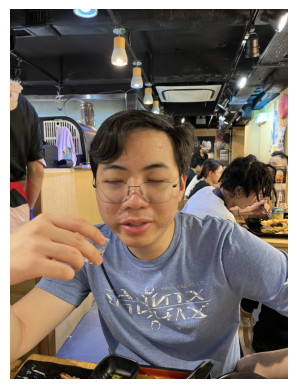

(4032, 3024, 3)

In [80]:
# load in image
img = imread("image.png")
show_image(img)

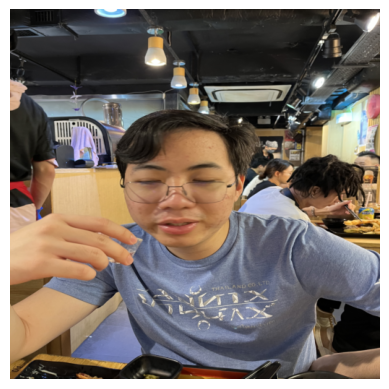

(512, 512, 3)

In [81]:
# resize image
img = resize(img, (128 * 4, 128 * 4))
show_image(img)

C:\Users\fongc\AppData\Local\Temp\ipykernel_4808\1846099626.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


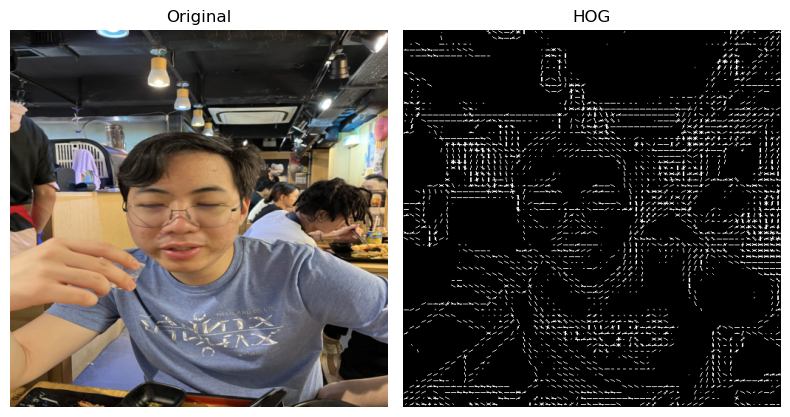

In [115]:
fd, hog_image = hog(
    img,
    orientations = 9,
    pixels_per_cell = (8, 8),
    cells_per_block = (2, 2),
    visualize = True,
    channel_axis = -1
)
# hog_image = exposure.rescale_intensity(hog_image, in_range = (0, 255))
# hog_image = exposure.equalize_adapthist(hog_image)
threshold_hog = np.copy(hog_image)
threshold_hog[threshold_hog >= 0.04] = 255

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 6), sharex = True, sharey = True)

ax1.imshow(img)
ax1.set_title("Original")
ax1.axis("off")

ax2.imshow(hog_image, cmap = 'gray')
ax2.set_title("HOG")
ax2.axis("off")

ax3.imshow(threshold_hog, cmap = 'gray')
ax3.set_title("HOG after thresholding")
ax3.axis("off")

fig.tight_layout()
fig.show()

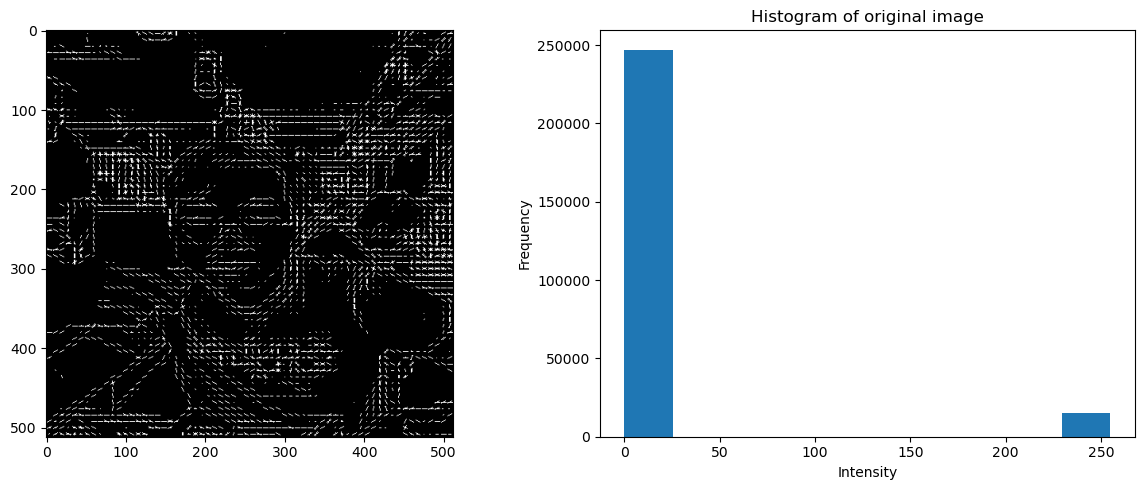

In [116]:
show_histogram(hog_image)

## Orientations

C:\Users\fongc\AppData\Local\Temp\ipykernel_4808\3054344609.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


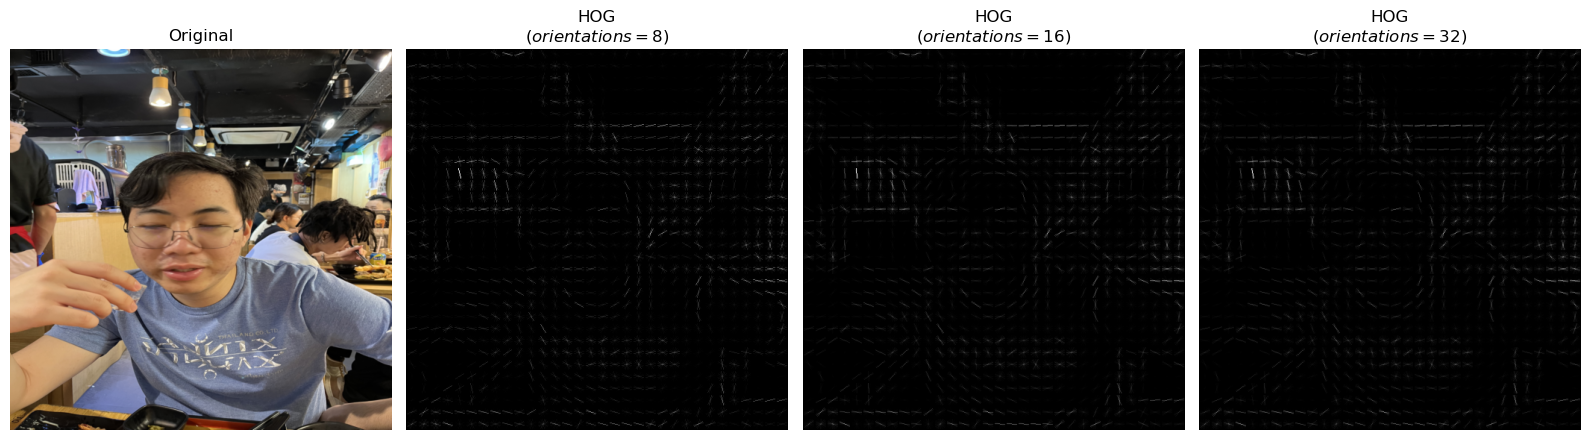

In [83]:
ORIENTATIONS = [None, 8, 16, 32]

# plot orientations in the same subplot
fig, axes = plt.subplots(1, len(ORIENTATIONS), figsize=(4 * len(ORIENTATIONS), 6), sharex = True, sharey = True)
for i, (ax, o) in enumerate(zip(axes, ORIENTATIONS)):
    if i == 0:
        # plot original image
        ax.imshow(img)
        ax.set_title("Original")
    else:
        fd, hog_image = hog(
            img,
            orientations = o,
            pixels_per_cell = (16, 16),
            cells_per_block = (1, 1),
            visualize = True,
            channel_axis = -1
        )
        hog_image = exposure.rescale_intensity(hog_image, in_range = (0, 10))
        ax.imshow(hog_image, cmap = "gray")
        ax.set_title("HOG\n($orientations = {}$)".format(o))
    ax.axis("off")

fig.tight_layout()
fig.show()

## Pixels per cell

C:\Users\fongc\AppData\Local\Temp\ipykernel_4808\3534858410.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


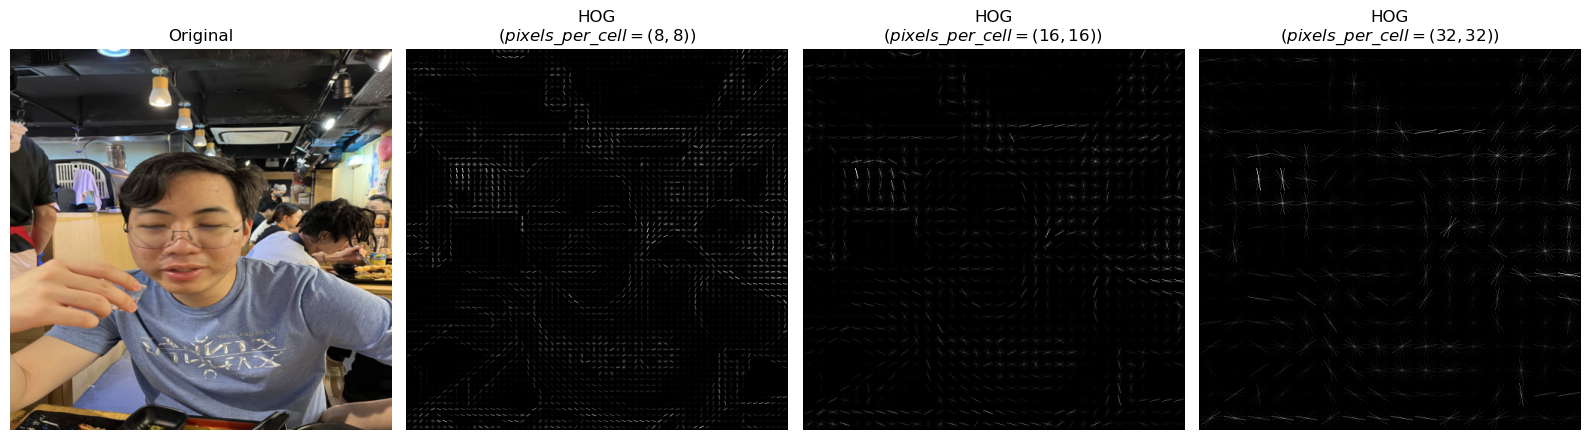

In [84]:
PIXELS_PER_CELL = [None, (8, 8), (16, 16), (32, 32)]

# plot pixels per cell in the same subplot
fig, axes = plt.subplots(1, len(PIXELS_PER_CELL), figsize=(4 * len(PIXELS_PER_CELL), 6), sharex = True, sharey = True)
for i, (ax, ppc) in enumerate(zip(axes, PIXELS_PER_CELL)):
    if i == 0:
        # plot original image
        ax.imshow(img)
        ax.set_title("Original")
    else:
        fd, hog_image = hog(
            img,
            orientations = 8,
            pixels_per_cell = ppc,
            cells_per_block = (1, 1),
            visualize = True,
            channel_axis = -1
        )
        hog_image = exposure.rescale_intensity(hog_image, in_range = (0, 10))
        ax.imshow(hog_image, cmap = "gray")
        ax.set_title("HOG\n($pixels\_per\_cell = {}$)".format(ppc))
    ax.axis("off")

fig.tight_layout()
fig.show()

## Cells per block

C:\Users\fongc\AppData\Local\Temp\ipykernel_4808\3162603712.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


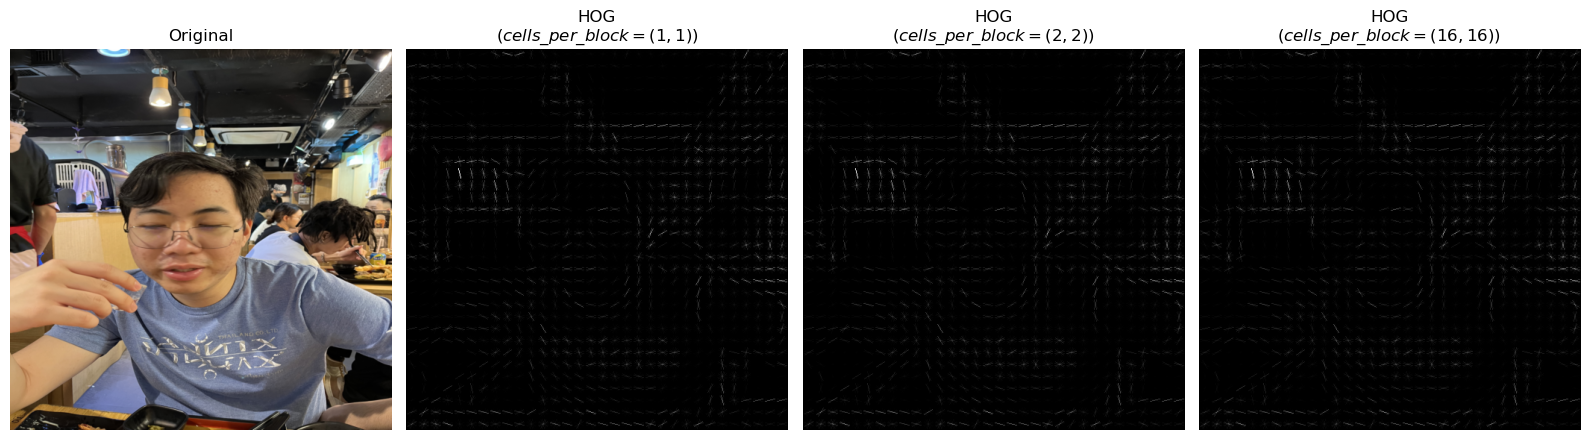

In [85]:
CELLS_PER_BLOCK = [None, (1, 1), (2, 2), (16, 16)]

# plot pixels per cell in the same subplot
fig, axes = plt.subplots(1, len(CELLS_PER_BLOCK), figsize=(4 * len(CELLS_PER_BLOCK), 6), sharex = True, sharey = True)
for i, (ax, cpb) in enumerate(zip(axes, CELLS_PER_BLOCK)):
    if i == 0:
        # plot original image
        ax.imshow(img)
        ax.set_title("Original")
    else:
        fd, hog_image = hog(
            img,
            orientations = 8,
            pixels_per_cell = (16, 16),
            cells_per_block = cpb,
            visualize = True,
            channel_axis = -1
        )
        hog_image = exposure.rescale_intensity(hog_image, in_range = (0, 10))
        ax.imshow(hog_image, cmap = "gray")
        ax.set_title("HOG\n($cells\_per\_block = {}$)".format(cpb))
    ax.axis("off")

fig.tight_layout()
fig.show()